In [54]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from warnings import filterwarnings
filterwarnings("ignore")

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose


# Data

In [312]:
xor_data=pd.DataFrame([[0,0,0],
                       [1,0,1],
                      [0,1,1],
                      [1,1,0]],columns=['a','b','target'])
xor_data

,a,b,target
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


## Data Plot

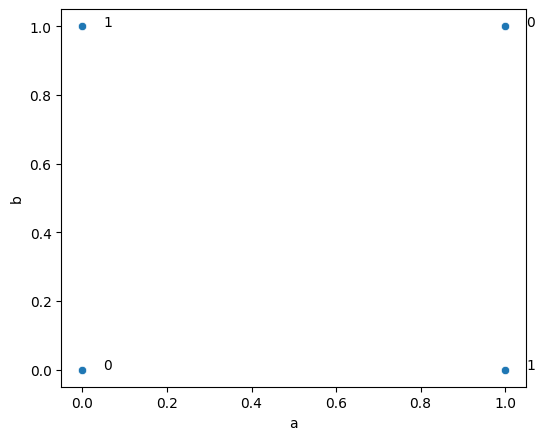

In [313]:
plt.figure(figsize=(6,5),dpi=100)
sns.scatterplot(data=xor_data,x='a',y='b')
for i in range(len(xor_data)):
    xs=xor_data.loc[i,'a']+0.05
    ys=xor_data.loc[i,'b']
    text=xor_data.loc[i,'target']
    plt.annotate(text,(xs,ys))
plt.show()

## Data Tensor

In [323]:
X=torch.Tensor([[0.,0.],
                       [1.,0.],
                      [0.,1.],
                      [1.,1.]])
y = torch.Tensor([0., 1., 1., 0.]).reshape(X.shape[0], 1) # respahe-e diqqet ele
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

# Deep Learning Model

## Create Model

In [364]:
class xor_model(nn.Module):
    def __init__(self):
        super(xor_model, self).__init__()
#         self.flat= nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid(),
            nn.Linear(2,1),
            nn.Sigmoid()
        )
    def forward(self,x):
#         flat_data=self.flat(x)
        result=self.linear_relu_stack(x)
        return result   
test_model=xor_model()

In [365]:
def train(data, model, loss_fn, optimizer):
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    loss_result=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss_result

## Train With Def

In [366]:
epoch=1000
lrt=.03
optimizer=torch.optim.Adam(test_model.parameters(),lr=lrt)
loss_fn=nn.MSELoss()
for epoch in range(epoch+1):
    loss_result=train(X, test_model, loss_fn, optimizer)
    if epoch%100==0:
        print("Epoch {}, Loss {}".format(epoch,loss_result))

Epoch 0, Loss 0.2505686581134796
Epoch 100, Loss 0.14956432580947876
Epoch 200, Loss 0.13023170828819275
Epoch 300, Loss 0.12755930423736572
Epoch 400, Loss 0.1265718787908554
Epoch 500, Loss 0.12608087062835693
Epoch 600, Loss 0.12579578161239624
Epoch 700, Loss 0.12561355531215668
Epoch 800, Loss 0.12548907101154327
Epoch 900, Loss 0.12539972364902496
Epoch 1000, Loss 0.12533318996429443


## Train With For loop

In [327]:
epoch=800
lrt=.03
optimizer=torch.optim.Adam(test_model.parameters(),lr=lrt)
loss_fn=nn.MSELoss()
for epoch in range(epoch+1):
    y_pred=test_model(X)
    loss=loss_fn(y_pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%100==0:
        print("Epoch {}, Loss {}".format(epoch,loss.item()))

Epoch 0, Loss 0.0031473226845264435
Epoch 100, Loss 0.0004088380665052682
Epoch 200, Loss 0.00017554467194713652
Epoch 300, Loss 0.00010167010623263195
Epoch 400, Loss 6.764745194232091e-05
Epoch 500, Loss 4.879791958956048e-05
Epoch 600, Loss 3.711500175995752e-05
Epoch 700, Loss 2.9304846975719556e-05
Epoch 800, Loss 2.3790191335137933e-05


## Test

In [361]:
input_test = torch.tensor([0.,0.])
test_model.forward(X.round())

tensor([[0.0503],
        [0.9524],
        [0.9520],
        [0.0466]], grad_fn=<SigmoidBackward0>)

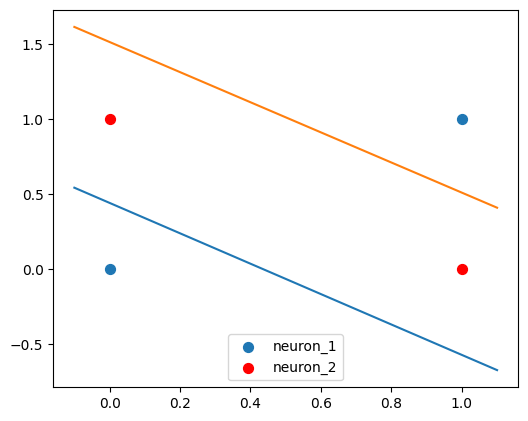

In [362]:
model_params=list(test_model.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.figure(figsize=(6,5),dpi=100)
plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])

plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()